In [1]:
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#Data
data = datasets.load_iris()

#print(data)

In [3]:
x = data.data
y = data.target
z = data.target_names

In [4]:
#split dataset
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3)

#data shapes
print(x_train.shape)
print(x_validation.shape)

(105, 4)
(45, 4)


In [5]:
#Build model
model = Sequential()
model.add(Dense(100,input_shape=(4,), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

2022-02-16 13:30:46.545287: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [7]:
#compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
#fit the model
hist = model.fit(x_train,y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 1.6655 - accuracy: 0.3048
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 1.5109 - accuracy: 0.3143
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 1.5297 - accuracy: 0.3238
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 1.3329 - accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 1.3422 - accuracy: 0.3238
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 1.2968 - accuracy: 0.2952
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 1.2901 - accuracy: 0.3429
Epoch 8/50
4/4 [==============================] - 0s 6ms/step - loss: 1.2253 - accuracy: 0.3524
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0970 - accuracy: 0.5048
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1498 - accuracy: 0.3905
Epoch 11/50
4/4 [====================

Text(0.5, 0, 'epoch')

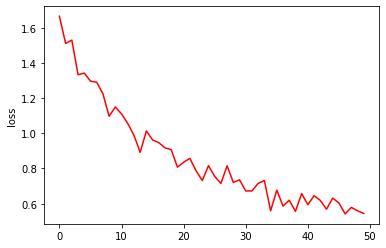

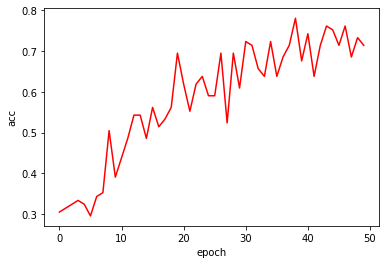

In [9]:
plt.figure()
#plt.plot(hist.history['validation_loss'], 'b')
plt.plot(hist.history['loss'], 'r')
plt.ylabel('loss')

plt.figure()
#plt.plot(hist.history['validation_accuracy'], 'b')
plt.plot(hist.history['accuracy'], 'r')
plt.ylabel('acc')
plt.xlabel('epoch')

In [10]:
#evaluate
model.evaluate(x_validation, y_validation)

2/2 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 1.0000


[0.3962904214859009, 1.0]

In [11]:
#prediction for 1st 10 obs.
pred = model.predict(x_validation[:10])
print(pred)

[[0.10733545 0.5007099  0.3919546 ]
 [0.09813596 0.5232431  0.37862086]
 [0.82865334 0.12962689 0.04171977]
 [0.8808171  0.09190631 0.02727661]
 [0.8264471  0.12646112 0.04709176]
 [0.8384045  0.11600267 0.04559293]
 [0.09003035 0.5357665  0.37420315]
 [0.017666   0.3770704  0.6052636 ]
 [0.83423424 0.12635155 0.03941425]
 [0.82326436 0.1266216  0.050114  ]]


In [12]:
p = np.argmax(pred, axis=1)

print(p)
print(y_validation[:10])

[1 1 0 0 0 0 1 2 0 0]
[1 1 0 0 0 0 1 2 0 0]


In [13]:
#prediction result

for i in p:
	print("prediction-class: {}, Name: {}".format(i,z[i]))

prediction-class: 1, Name: versicolor
prediction-class: 1, Name: versicolor
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
prediction-class: 1, Name: versicolor
prediction-class: 2, Name: virginica
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
